# Tyler's Workspace-Cleaned

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Making a subset of big studio movies

In [2]:
# First lets get this data set with studio data
bom_df = pd.read_csv('../zippedData/bom.movie_gross.csv.gz')
bom_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [3]:
# Cleaning the foreign_gross column so we can work with it
bom_df['foreign_gross'] = bom_df['foreign_gross'].str.replace(',','').astype(float)
# Now we replace the nulls with zeroes
bom_df['foreign_gross'].fillna(0, inplace=True)

In [4]:
# We're gonna make a worldwide_gross column
bom_df['worldwide_gross'] = bom_df['domestic_gross'] + bom_df['foreign_gross']
bom_df.head()

,title,studio,domestic_gross,foreign_gross,year,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08


In [5]:
# Now, we're gonna find the sum of worldwide gross for each studio
studio_sums = bom_df.groupby('studio')['worldwide_gross'].sum()
# then sort the values and select the top 25 highest sums
highest_sums = studio_sums.sort_values(ascending=False).head(25)
# now we take the index to get a list of studios we can select with
competing_studios = highest_sums.index
competing_studios

Index(['BV', 'Fox', 'WB', 'Uni.', 'Sony', 'Par.', 'WB (NL)', 'LGF', 'LG/S',
       'P/DW', 'Wein.', 'SGem', 'WGUSA', 'FoxS', 'Focus', 'Sum.', 'CL', 'TriS',
       'Rela.', 'STX', 'SPC', 'ORF', 'HC', 'W/Dim.', 'FD'],
      dtype='object', name='studio')

In [6]:
bom_df[bom_df['studio'].isin(competing_studios)]

,title,studio,domestic_gross,foreign_gross,year,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08
...,...,...,...,...,...,...
3362,Oolong Courtyard,CL,37700.0,0.0,2018,3.770000e+04
3363,Girls vs Gangsters,WGUSA,37100.0,0.0,2018,3.710000e+04
3369,Loving Pablo,Uni.,22000.0,0.0,2018,2.200000e+04
3371,Tag Along: The Devil Fish,CL,20700.0,0.0,2018,2.070000e+04


In [7]:
bom_df[bom_df['studio'] == 'CL']

,title,studio,domestic_gross,foreign_gross,year,worldwide_gross
63,Aftershock (Tangshan Dadizhen),CL,63000.0,100200000.0,2010,100263000.0
79,If You Are the One 2 (Fei Cheng Wu Rao II),CL,427000.0,75600000.0,2010,76027000.0
427,Beginning of the Great Revival,CL,151000.0,58200000.0,2011,58351000.0
504,The Warring States,CL,69000.0,11800000.0,2011,11869000.0
505,What Women Want (Wo Zhi Nu Run Xin),CL,124000.0,11700000.0,2011,11824000.0
...,...,...,...,...,...,...
3044,Twenty Two,CL,46800.0,0.0,2017,46800.0
3184,Namiya,CL,70800.0,35300000.0,2018,35370800.0
3319,Last Letter,CL,181000.0,0.0,2018,181000.0
3362,Oolong Courtyard,CL,37700.0,0.0,2018,37700.0


## Making a dataframe with studios and budget data

In [8]:
# We'll get the money data from the numbers df below, we only need title and studio
studios = bom_df.iloc[:, :2]
studios.head()

,title,studio
0,Toy Story 3,BV
1,Alice in Wonderland (2010),BV
2,Harry Potter and the Deathly Hallows Part 1,WB
3,Inception,WB
4,Shrek Forever After,P/DW


In [9]:
# let's get the budget data
numbers_df = pd.read_csv('../zippedData/tn.movie_budgets.csv.gz')
numbers_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [10]:
# Now let's only include the parts we need
budgets = numbers_df.iloc[:, 2:]
budgets.head()

,movie,production_budget,domestic_gross,worldwide_gross
0,Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [11]:
# Now let's clean the money data
def clean_money(df, col):
    df[col] = df[col].str.replace('$','').str.replace(',','').astype(float)
clean_money(budgets, 'production_budget')
clean_money(budgets, 'domestic_gross')
clean_money(budgets, 'worldwide_gross')
budgets.head()

,movie,production_budget,domestic_gross,worldwide_gross
0,Avatar,425000000.0,760507625.0,2.776345e+09
1,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


In [12]:
# before we join data, let's look at what data we have
studios.shape, budgets.shape

((3387, 2), (5782, 4))

In [13]:
# Now we have studios data and budget data we can join
studio_budget_inner = studios.merge(budgets, left_on='title', right_on='movie', how='inner')
studio_budget_inner

,title,studio,movie,production_budget,domestic_gross,worldwide_gross
0,Toy Story 3,BV,Toy Story 3,200000000.0,415004880.0,1.068880e+09
1,Inception,WB,Inception,160000000.0,292576195.0,8.355246e+08
2,Shrek Forever After,P/DW,Shrek Forever After,165000000.0,238736787.0,7.562447e+08
3,The Twilight Saga: Eclipse,Sum.,The Twilight Saga: Eclipse,68000000.0,300531751.0,7.061028e+08
4,Iron Man 2,Par.,Iron Man 2,170000000.0,312433331.0,6.211564e+08
...,...,...,...,...,...,...
1242,Gotti,VE,Gotti,10000000.0,4286367.0,6.089100e+06
1243,Ben is Back,RAtt.,Ben is Back,13000000.0,3703182.0,9.633111e+06
1244,Bilal: A New Breed of Hero,VE,Bilal: A New Breed of Hero,30000000.0,490973.0,6.485990e+05
1245,Mandy,RLJ,Mandy,6000000.0,1214525.0,1.427656e+06


In [14]:
studio_budget_outer = studios.merge(budgets, left_on='title', right_on='movie', how='outer')
studio_budget_outer

,title,studio,movie,production_budget,domestic_gross,worldwide_gross
0,Toy Story 3,BV,Toy Story 3,200000000.0,415004880.0,1.068880e+09
1,Alice in Wonderland (2010),BV,NaN,NaN,NaN,NaN
2,Harry Potter and the Deathly Hallows Part 1,WB,NaN,NaN,NaN,NaN
3,Inception,WB,Inception,160000000.0,292576195.0,8.355246e+08
4,Shrek Forever After,P/DW,Shrek Forever After,165000000.0,238736787.0,7.562447e+08
...,...,...,...,...,...,...
7926,NaN,NaN,Red 11,7000.0,0.0,0.000000e+00
7927,NaN,NaN,Following,6000.0,48482.0,2.404950e+05
7928,NaN,NaN,Return to the Land of Wonders,5000.0,1338.0,1.338000e+03
7929,NaN,NaN,A Plague So Pleasant,1400.0,0.0,0.000000e+00


In [15]:
# We lost a lot of data, but it still should be enough to get meaningful data from
big_studio_budgets = studio_budget_inner[studio_budget_inner['studio'].isin(competing_studios)]
big_studio_budgets

,title,studio,movie,production_budget,domestic_gross,worldwide_gross
0,Toy Story 3,BV,Toy Story 3,200000000.0,415004880.0,1.068880e+09
1,Inception,WB,Inception,160000000.0,292576195.0,8.355246e+08
2,Shrek Forever After,P/DW,Shrek Forever After,165000000.0,238736787.0,7.562447e+08
3,The Twilight Saga: Eclipse,Sum.,The Twilight Saga: Eclipse,68000000.0,300531751.0,7.061028e+08
4,Iron Man 2,Par.,Iron Man 2,170000000.0,312433331.0,6.211564e+08
...,...,...,...,...,...,...
1228,Superfly,Sony,Superfly,16000000.0,20537137.0,2.072358e+07
1230,Hell Fest,LGF,Hell Fest,5500000.0,11107431.0,1.811923e+07
1235,Welcome to Marwen,Uni.,Welcome to Marwen,45000000.0,10763520.0,1.287492e+07
1237,Kin,LGF,Kin,30000000.0,5718096.0,1.009682e+07


## Creating Profit and ROI Columns

In [16]:
# making profit column
big_studio_budgets['profit'] = big_studio_budgets['worldwide_gross'] - big_studio_budgets['production_budget']
big_studio_budgets.head()

<ipython-input-16-01f3eef059e7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big_studio_budgets['profit'] = big_studio_budgets['worldwide_gross'] - big_studio_budgets['production_budget']


,title,studio,movie,production_budget,domestic_gross,worldwide_gross,profit
0,Toy Story 3,BV,Toy Story 3,200000000.0,415004880.0,1.068880e+09,868879522.0
1,Inception,WB,Inception,160000000.0,292576195.0,8.355246e+08,675524642.0
2,Shrek Forever After,P/DW,Shrek Forever After,165000000.0,238736787.0,7.562447e+08,591244673.0
3,The Twilight Saga: Eclipse,Sum.,The Twilight Saga: Eclipse,68000000.0,300531751.0,7.061028e+08,638102828.0
4,Iron Man 2,Par.,Iron Man 2,170000000.0,312433331.0,6.211564e+08,451156389.0


In [17]:
# making ROI column
big_studio_budgets['ROI'] = (big_studio_budgets['profit'] / big_studio_budgets['production_budget'])*100
big_studio_budgets.head()

<ipython-input-17-b9239262b9f7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big_studio_budgets['ROI'] = (big_studio_budgets['profit'] / big_studio_budgets['production_budget'])*100


,title,studio,movie,production_budget,domestic_gross,worldwide_gross,profit,ROI
0,Toy Story 3,BV,Toy Story 3,200000000.0,415004880.0,1.068880e+09,868879522.0,434.439761
1,Inception,WB,Inception,160000000.0,292576195.0,8.355246e+08,675524642.0,422.202901
2,Shrek Forever After,P/DW,Shrek Forever After,165000000.0,238736787.0,7.562447e+08,591244673.0,358.330105
3,The Twilight Saga: Eclipse,Sum.,The Twilight Saga: Eclipse,68000000.0,300531751.0,7.061028e+08,638102828.0,938.386512
4,Iron Man 2,Par.,Iron Man 2,170000000.0,312433331.0,6.211564e+08,451156389.0,265.386111


In [18]:
# We lost around a third of our select studios data from the bom_df,
# but let's look at correlations anyways
big_studio_budgets.corr()

,production_budget,domestic_gross,worldwide_gross,profit,ROI
production_budget,1.000000,0.673319,0.765435,0.636279,-0.096886
domestic_gross,0.673319,1.000000,0.935117,0.931607,0.059063
worldwide_gross,0.765435,0.935117,1.000000,0.983474,0.043160
profit,0.636279,0.931607,0.983474,1.000000,0.078999
ROI,-0.096886,0.059063,0.043160,0.078999,1.000000


In [19]:
import seaborn as sns

<AxesSubplot:>

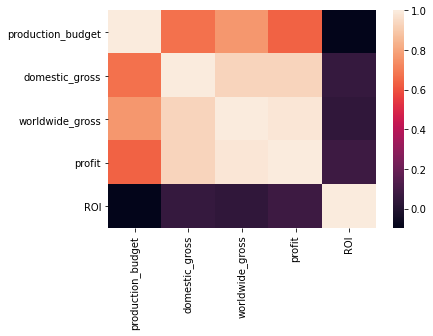

In [20]:
sns.heatmap(big_studio_budgets.corr())

## Group the data by studio

In [21]:
big_studio_budgets.groupby('studio')['ROI','production_budget'].corr()

<ipython-input-21-ec0afeb357eb>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  big_studio_budgets.groupby('studio')['ROI','production_budget'].corr()


ROI  production_budget
studio                                                
BV      ROI                1.000000           0.213122
        production_budget  0.213122           1.000000
FD      ROI                1.000000          -0.573937
        production_budget -0.573937           1.000000
Focus   ROI                1.000000          -0.337363
        production_budget -0.337363           1.000000
Fox     ROI                1.000000           0.001438
        production_budget  0.001438           1.000000
FoxS    ROI                1.000000          -0.001982
        production_budget -0.001982           1.000000
LG/S    ROI                1.000000          -0.371465
        production_budget -0.371465           1.000000
LGF     ROI                1.000000          -0.192641
        production_budget -0.192641           1.000000
ORF     ROI                1.000000          -0.376453
        production_budget -0.376453           1.000000
P/DW    ROI                1.000000           0.826594
        production_budget  0.826594           1.000000
Par.    ROI                1.000000          -0.272067
        production_budget -0.272067           1.000000
Rela.   ROI                1.000000          -0.324899
        production_budget -0.324899           1.000000
SGem    ROI                1.000000          -0.272377
        production_budget -0.272377           1.000000
SPC     ROI                1.000000          -0.165499
        production_budget -0.165499           1.000000
STX     ROI                1.000000          -0.394751
        production_budget -0.394751           1.000000
Sony    ROI                1.000000          -0.077696
        production_budget -0.077696           1.000000
Sum.    ROI                1.000000           0.402148
        production_budget  0.402148           1.000000
TriS    ROI                1.000000          -0.426425
        production_budget -0.426425           1.000000
Uni.    ROI                1.000000          -0.282552
        production_budget -0.282552           1.000000
W/Dim.  ROI                1.000000          -0.287938
        production_budget -0.287938           1.000000
WB      ROI                1.000000          -0.134669
        production_budget -0.134669           1.000000
WB (NL) ROI                1.000000          -0.175929
        production_budget -0.175929           1.000000
Wein.   ROI                1.000000          -0.321659
        production_budget -0.321659           1.000000

In [33]:
big_studio_budgets.groupby('studio')['ROI'].mean()

studio
BV          224.511590
FD         1031.694273
Focus       241.043128
Fox         245.270213
FoxS        336.451831
LG/S        300.621005
LGF         354.807568
ORF         227.431114
P/DW        235.684094
Par.        571.673832
Rela.       167.271634
SGem        273.650084
SPC         195.245958
STX         233.041329
Sony        262.599480
Sum.        192.653046
TriS        491.725761
Uni.        578.390730
W/Dim.      258.536432
WB          224.805506
WB (NL)    1649.593358
Wein.       368.099411
Name: ROI, dtype: float64

In [34]:
big_studio_budgets[big_studio_budgets['studio'] == 'WB (NL)']

,title,studio,movie,production_budget,domestic_gross,worldwide_gross,profit,ROI
20,Sex and the City 2,WB (NL),Sex and the City 2,95000000.0,95347692.0,2.946808e+08,199680778.0,210.190293
27,Valentine's Day,WB (NL),Valentine's Day,52000000.0,110485654.0,2.175693e+08,165569328.0,318.402554
89,Going the Distance,WB (NL),Going the Distance,32000000.0,17804299.0,4.360399e+07,11603990.0,36.262469
211,Horrible Bosses,WB (NL),Horrible Bosses,35000000.0,117538559.0,2.124176e+08,177417601.0,506.907431
223,Final Destination 5,WB (NL),Final Destination 5,40000000.0,42587643.0,1.550112e+08,115011165.0,287.527913
246,The Rite,WB (NL),The Rite,37000000.0,33047633.0,9.714399e+07,60143987.0,162.551316
253,Hall Pass,WB (NL),Hall Pass,68000000.0,45060734.0,8.717348e+07,19173475.0,28.196287
354,The Hobbit: An Unexpected Journey,WB (NL),The Hobbit: An Unexpected Journey,250000000.0,303003568.0,1.017004e+09,767003568.0,306.801427
368,Journey 2: The Mysterious Island,WB (NL),Journey 2: The Mysterious Island,79000000.0,103860290.0,3.181462e+08,239146162.0,302.716661
425,Rock of Ages,WB (NL),Rock of Ages,70000000.0,38518613.0,6.103193e+07,-8968068.0,-12.811526


## Group by genres

In [22]:
import sqlite3
con = sqlite3.connect("../../im.db")

In [23]:
imdb_genres = pd.read_sql("""
SELECT movie_id,
    primary_title,
    genres
FROM movie_basics
JOIN movie_ratings
    USING(movie_id)
;""", con)
imdb_genres

,movie_id,primary_title,genres
0,tt0063540,Sunghursh,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,Drama
3,tt0069204,Sabse Bada Sukh,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,"Comedy,Drama,Fantasy"
...,...,...,...
73851,tt9913084,Diabolik sono io,Documentary
73852,tt9914286,Sokagin Çocuklari,"Drama,Family"
73853,tt9914642,Albatross,Documentary
73854,tt9914942,La vida sense la Sara Amat,None


In [24]:
# function to make a boolean column for every genre
def make_genre_bool(genre):
    imdb_genres[genre] =imdb_genres['genres'].str.contains(genre)
# list of majority of genres to make boolean columns
Genre_list = ['Drama', 'Documentary', 'Comedy', 'Horror', 'Thriller', 'Romance', 'Action',
              'Biography', 'Family', 'History', 'Mystery', 'Sci-Fi', 'Crime', 'Animation', 'Adventure']

In [25]:
# loop to make all of these genres a column
for genre in Genre_list:
    make_genre_bool(genre)
imdb_genres.head()

,movie_id,primary_title,genres,Drama,Documentary,Comedy,Horror,Thriller,Romance,Action,Biography,Family,History,Mystery,Sci-Fi,Crime,Animation,Adventure
0,tt0063540,Sunghursh,"Action,Crime,Drama",True,False,False,False,False,False,True,False,False,False,False,False,True,False,False
1,tt0066787,One Day Before the Rainy Season,"Biography,Drama",True,False,False,False,False,False,False,True,False,False,False,False,False,False,False
2,tt0069049,The Other Side of the Wind,Drama,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,tt0069204,Sabse Bada Sukh,"Comedy,Drama",True,False,True,False,False,False,False,False,False,False,False,False,False,False,False
4,tt0100275,The Wandering Soap Opera,"Comedy,Drama,Fantasy",True,False,True,False,False,False,False,False,False,False,False,False,False,False,False


In [26]:
studio_budget_genre = big_studio_budgets.merge(imdb_genres, left_on='title', right_on='primary_title', how='inner')
studio_budget_genre.drop_duplicates()

,title,studio,movie,production_budget,domestic_gross,worldwide_gross,profit,ROI,movie_id,primary_title,...,Romance,Action,Biography,Family,History,Mystery,Sci-Fi,Crime,Animation,Adventure
0,Toy Story 3,BV,Toy Story 3,200000000.0,415004880.0,1.068880e+09,868879522.0,434.439761,tt0435761,Toy Story 3,...,False,False,False,False,False,False,False,False,True,True
1,Inception,WB,Inception,160000000.0,292576195.0,8.355246e+08,675524642.0,422.202901,tt1375666,Inception,...,False,True,False,False,False,False,True,False,False,True
2,Shrek Forever After,P/DW,Shrek Forever After,165000000.0,238736787.0,7.562447e+08,591244673.0,358.330105,tt0892791,Shrek Forever After,...,False,False,False,False,False,False,False,False,True,True
3,The Twilight Saga: Eclipse,Sum.,The Twilight Saga: Eclipse,68000000.0,300531751.0,7.061028e+08,638102828.0,938.386512,tt1325004,The Twilight Saga: Eclipse,...,False,False,False,False,False,False,False,False,False,True
4,Iron Man 2,Par.,Iron Man 2,170000000.0,312433331.0,6.211564e+08,451156389.0,265.386111,tt1228705,Iron Man 2,...,False,True,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1120,Hell Fest,LGF,Hell Fest,5500000.0,11107431.0,1.811923e+07,12619231.0,229.440564,tt1999890,Hell Fest,...,False,False,False,False,False,False,False,False,False,False
1121,Welcome to Marwen,Uni.,Welcome to Marwen,45000000.0,10763520.0,1.287492e+07,-32125078.0,-71.389062,tt3289724,Welcome to Marwen,...,False,False,True,False,False,False,False,False,False,False
1122,Kin,LGF,Kin,30000000.0,5718096.0,1.009682e+07,-19903179.0,-66.343930,tt2233624,Kin,...,False,False,False,False,False,False,False,False,False,False
1123,Kin,LGF,Kin,30000000.0,5718096.0,1.009682e+07,-19903179.0,-66.343930,tt6017942,Kin,...,False,True,False,False,False,False,True,False,False,False


In [27]:
studio_budget_genre.dropna(inplace=True)

In [60]:
# Here's a function that will give us an average of any column grouped by the genre
def return_genre_mean(df, list_of_genres, column):
    means_dict = {}
    #loop through every genre from our genre list above
    for genre in list_of_genres:
        #get the mean
        mean = df[df[genre] == True][column].mean()
        #append to the list
        means_dict[genre] = mean
    return means_dict

In [57]:
def return_genre_median(df, list_of_genres, column):
    medians_dict = {}
    #loop through every genre from our genre list above
    for genre in list_of_genres:
        #get the mean
        median = df[df[genre] == True][column].median()
        #append to the list
        medians_dict[genre] = median
    return medians_dict

In [61]:
return_genre_mean(studio_budget_genre, Genre_list, 'profit')

{'Drama': 69639319.4201521,
 'Documentary': 109796705.35294117,
 'Comedy': 122839895.81216931,
 'Horror': 92424081.06422019,
 'Thriller': 109674113.49494949,
 'Romance': 64662228.75862069,
 'Action': 192316963.96745563,
 'Biography': 77175058.94,
 'Family': 121333416.86567163,
 'History': 76433379.3076923,
 'Mystery': 85226313.78823529,
 'Sci-Fi': 293410686.11,
 'Crime': 77360140.34666666,
 'Animation': 310137633.55172414,
 'Adventure': 276576399.49285716}

In [59]:
return_genre_median(studio_budget_genre, Genre_list, 'profit')

{'Drama': 30896375.5,
 'Documentary': 34981126.5,
 'Comedy': 58922637.5,
 'Horror': 55989590.0,
 'Thriller': 55088156.0,
 'Romance': 31623819.0,
 'Action': 85198264.0,
 'Biography': 26373933.5,
 'Family': 58291478.0,
 'History': 36118378.0,
 'Mystery': 55989590.0,
 'Sci-Fi': 167054362.0,
 'Crime': 35682206.0,
 'Animation': 234942531.0,
 'Adventure': 162347671.5}

In [75]:
big_studio_budgets.groupby('studio')['ROI'].mean()

studio
BV          224.511590
FD         1031.694273
Focus       241.043128
Fox         245.270213
FoxS        336.451831
LG/S        300.621005
LGF         354.807568
ORF         227.431114
P/DW        235.684094
Par.        571.673832
Rela.       167.271634
SGem        273.650084
SPC         195.245958
STX         233.041329
Sony        262.599480
Sum.        192.653046
TriS        491.725761
Uni.        578.390730
W/Dim.      258.536432
WB          224.805506
WB (NL)    1649.593358
Wein.       368.099411
Name: ROI, dtype: float64

In [76]:
big_studio_budgets.groupby('studio')['profit'].mean()

studio
BV         3.310447e+08
FD         3.366012e+07
Focus      3.605226e+07
Fox        1.730938e+08
FoxS       3.581295e+07
LG/S       6.959919e+07
LGF        8.055740e+07
ORF        1.781508e+07
P/DW       3.744028e+08
Par.       1.306514e+08
Rela.      2.801267e+07
SGem       6.687388e+07
SPC        1.423107e+07
STX        4.324319e+07
Sony       1.696123e+08
Sum.       8.573647e+07
TriS       6.370211e+07
Uni.       1.771931e+08
W/Dim.     5.204399e+07
WB         1.372168e+08
WB (NL)    1.727639e+08
Wein.      4.834126e+07
Name: profit, dtype: float64

In [35]:
# You can look at any genres r^2 values here
studio_budget_genre[studio_budget_genre['Horror']].corr()

,production_budget,domestic_gross,worldwide_gross,profit,ROI
production_budget,1.000000,0.449697,0.646371,0.436418,-0.188453
domestic_gross,0.449697,1.000000,0.902661,0.917904,0.051320
worldwide_gross,0.646371,0.902661,1.000000,0.968614,0.000988
profit,0.436418,0.917904,0.968614,1.000000,0.062558
ROI,-0.188453,0.051320,0.000988,0.062558,1.000000


## Popularity Data

In [38]:
tmovie_db = pd.read_csv('../zippedData/tmdb.movies.csv.gz', index_col=0)
tmovie_db

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [68]:
popularity = tmovie_db.loc[:, ['popularity','title']]
popularity.drop_duplicates(inplace=True)

((26517, 2), None)

In [69]:
studio_budget_genre_popularity = studio_budget_genre.merge(popularity, on='title', how='inner')
studio_budget_genre_popularity

,title,studio,movie,production_budget,domestic_gross,worldwide_gross,profit,ROI,movie_id,primary_title,...,Action,Biography,Family,History,Mystery,Sci-Fi,Crime,Animation,Adventure,popularity
0,Toy Story 3,BV,Toy Story 3,200000000.0,415004880.0,1.068880e+09,868879522.0,434.439761,tt0435761,Toy Story 3,...,False,False,False,False,False,False,False,True,True,24.445
1,Inception,WB,Inception,160000000.0,292576195.0,8.355246e+08,675524642.0,422.202901,tt1375666,Inception,...,True,False,False,False,False,True,False,False,True,27.920
2,Shrek Forever After,P/DW,Shrek Forever After,165000000.0,238736787.0,7.562447e+08,591244673.0,358.330105,tt0892791,Shrek Forever After,...,False,False,False,False,False,False,False,True,True,15.041
3,The Twilight Saga: Eclipse,Sum.,The Twilight Saga: Eclipse,68000000.0,300531751.0,7.061028e+08,638102828.0,938.386512,tt1325004,The Twilight Saga: Eclipse,...,False,False,False,False,False,False,False,False,True,20.340
4,Iron Man 2,Par.,Iron Man 2,170000000.0,312433331.0,6.211564e+08,451156389.0,265.386111,tt1228705,Iron Man 2,...,True,False,False,False,False,True,False,False,True,28.515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,Hell Fest,LGF,Hell Fest,5500000.0,11107431.0,1.811923e+07,12619231.0,229.440564,tt1999890,Hell Fest,...,False,False,False,False,False,False,False,False,False,12.955
1269,Welcome to Marwen,Uni.,Welcome to Marwen,45000000.0,10763520.0,1.287492e+07,-32125078.0,-71.389062,tt3289724,Welcome to Marwen,...,False,True,False,False,False,False,False,False,False,22.032
1270,Kin,LGF,Kin,30000000.0,5718096.0,1.009682e+07,-19903179.0,-66.343930,tt2233624,Kin,...,False,False,False,False,False,False,False,False,False,23.805
1271,Kin,LGF,Kin,30000000.0,5718096.0,1.009682e+07,-19903179.0,-66.343930,tt6017942,Kin,...,True,False,False,False,False,True,False,False,False,23.805


In [70]:
return_genre_mean(studio_budget_genre_popularity, Genre_list, 'popularity')

{'Drama': 11.621652892561984,
 'Documentary': 11.228704545454546,
 'Comedy': 12.53455198019802,
 'Horror': 10.746739130434785,
 'Thriller': 12.693357142857144,
 'Romance': 9.740350877192983,
 'Action': 17.33089516129032,
 'Biography': 12.644266666666665,
 'Family': 13.168057142857144,
 'History': 12.173727272727273,
 'Mystery': 12.606822916666665,
 'Sci-Fi': 19.17325471698113,
 'Crime': 13.782084848484848,
 'Animation': 15.710967032967032,
 'Adventure': 18.479241610738256}

In [71]:
return_genre_median(studio_budget_genre_popularity, Genre_list, 'popularity')

{'Drama': 10.308,
 'Documentary': 11.0225,
 'Comedy': 11.334000000000001,
 'Horror': 9.9925,
 'Thriller': 11.8975,
 'Romance': 9.781,
 'Action': 15.444,
 'Biography': 10.352,
 'Family': 10.928,
 'History': 12.04,
 'Mystery': 11.07,
 'Sci-Fi': 17.5485,
 'Crime': 12.96,
 'Animation': 14.972999999999999,
 'Adventure': 16.36}

In [74]:
studio_budget_genre_popularity.groupby('studio')['popularity'].mean()

studio
BV         19.077912
FD         11.560111
Focus      10.285232
Fox        14.243444
FoxS        8.790987
LG/S       15.286781
LGF        13.391118
ORF         9.575029
P/DW       14.669800
Par.       13.294886
Rela.       9.693971
SGem       10.461000
SPC         8.674938
STX        14.888737
Sony       15.355329
Sum.        8.299950
TriS       12.397474
Uni.       12.828771
W/Dim.     11.938000
WB         14.887444
WB (NL)    13.711154
Wein.      11.233560
Name: popularity, dtype: float64